In [1]:
import numpy as np

In [2]:
from sklearn.datasets import load_iris

In [3]:
X = load_iris()["data"]
y = load_iris()["target"]

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [5]:
def relu(x):
    return np.maximum(0,x)

In [6]:
# def softmax(x):
#     c = np.max(x)
#     x = x-c
#     return np.exp(x)/np.sum(np.exp(x))

In [7]:
def softmax(x):
    c = np.max(x,axis=1).reshape(-1,1)
    x = x-c
    return np.exp(x)/np.sum(np.exp(x),axis=1).reshape(-1,1)

In [8]:
def prob(x):
    return x/np.sum(x,axis=1).reshape(-1,1)

In [9]:
def categorical_crossentropy(t,y):
    return np.mean(-t*np.log(y))

In [10]:
def make_one(x):
    result = np.zeros((x.size, np.unique(x).size))
    for idx1,idx2 in enumerate(x):
        result[idx1,idx2] = 1
    return result

In [11]:
X.shape

(150, 4)

In [12]:
y = make_one(y)

In [13]:
input_shape = X.shape[1:]
output_shape = y.shape[1:]

In [14]:
W1 = np.random.randn(4,50)
b1 = np.zeros(50)
W2 = np.random.randn(50,3)
b2 = np.zeros(3)

In [15]:
def predict(x):
    W1 = np.random.randn(4,50)
    b1 = np.zeros(50)
    W2 = np.random.randn(50,3)
    b2 = np.zeros(3)
    layer1 = np.dot(x,W1) + b1
    z1 = sigmoid(layer1)
    layer2 = np.dot(z1,W2) + b2
    out = softmax(layer2)
    return out

In [16]:
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=["multi_index"],op_flags=["readwrite"])
    
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh = f(x)
        x[idx] = tmp_val
        fx = f(x)
        grad[idx] = (fxh-fx)/h
        it.iternext()
    return grad

# Class 추가

In [17]:
class Network:
    def __init__(self, weight_decay):
        self.layer = {}
        self.weight_decay = weight_decay
    
    def add(self,x1,x2,activation):
        activation_dict = {
            "sigmoid" : sigmoid,
            "relu" : relu,
            "softmax" : softmax,
            "prob" : prob
        }
        w = "W"+str(int(len(self.layer)/3+1))
        b = "b"+str(int(len(self.layer)/3+1))
        a = "activation"+str(int(len(self.layer)/3+1))
        
        self.layer[w] = np.random.randn(x1,x2) * self.weight_decay
        self.layer[b] = np.zeros(x2)
        self.layer[a] = activation_dict[activation]
        
    def predict(self,x):
        length = int(len(self.layer)/3)+1
        y = x.copy()
        for i in range(1,length):
            w = "W"+str(i)
            b = "b"+str(i)
            a = "activation"+str(i)
            y = np.dot(y,self.layer[w]) + self.layer[b]
            y = self.layer[a](y)
        return y
    
    def loss(self,x,t):
        y = self.predict(x)
        err = categorical_crossentropy(t,y) 
        self.err = err
        return self.err
    
    def accuracy(self,x,t):
        y = self.predict(x)
        y = np.argmax(y,axis=1)
        t = np.argmax(t,axis=1)
        self.acc = np.sum(y==t)/t.size
        return self.acc
    
    def gradient(self,x,t):
        lr = self.lr
        W_loss = lambda W : self.loss(x,t)
        length = int(len(self.layer)/3)+1
        y = x.copy()
        for i in range(1,length):
            w = "W"+str(i)
            b = "b"+str(i)
            dW = numerical_gradient(W_loss,self.layer[w])
            db = numerical_gradient(W_loss,self.layer[b])
            self.layer[w] -= dW*lr
            self.layer[b] -= db*lr
        
    def fit(self,x,t,epochs,lr):
        self.lr = lr
        self.history = {}
        loss = []
        accuracy = []
        for epoch in range(epochs):
            self.gradient(x,t)
            loss.append(self.err)
            accuracy.append(self.accuracy(x,t))
            if epoch % 100 == 0:
                print(f'loss : {self.err} === accuracy : {self.accuracy(x,t)}')
        self.history["loss"] = loss
        self.history["accuracy"] = accuracy

In [18]:
model1 = Network(weight_decay=0.5)
model2 = Network(weight_decay=1.)

In [19]:
model1.add(4,10,"relu")
model1.add(10,3,"softmax")

In [20]:
model2.add(4,10,"relu")
model2.add(10,3,"softmax")

In [21]:
# model2.layer["W1"] = model1.layer["W1"].copy()
# model2.layer["W2"] = model1.layer["W2"].copy()

In [22]:
model2.layer["W1"] = model1.layer["W1"] * 2.
model2.layer["W2"] = model1.layer["W2"] * 2.

In [23]:
%%time
model1.fit(X,y,1000, 1e-4)

loss : 1.345717434757366 === accuracy : 0.3333333333333333
loss : 1.191941417355655 === accuracy : 0.3333333333333333
loss : 1.0461306132995027 === accuracy : 0.3333333333333333
loss : 0.911218795608864 === accuracy : 0.3333333333333333
loss : 0.7905728989583498 === accuracy : 0.3333333333333333
loss : 0.6869933457861293 === accuracy : 0.3333333333333333
loss : 0.6017207127728531 === accuracy : 0.3333333333333333
loss : 0.5341515749049448 === accuracy : 0.3333333333333333
loss : 0.48227731191072737 === accuracy : 0.3333333333333333
loss : 0.4433726070237253 === accuracy : 0.3333333333333333
CPU times: total: 12.7 s
Wall time: 12.7 s


In [24]:
%%time
model2.fit(X,y,1000, 1e-4)

loss : 5.363173116030872 === accuracy : 0.3333333333333333
loss : 4.717877528732327 === accuracy : 0.3333333333333333
loss : 4.080930717956053 === accuracy : 0.3333333333333333
loss : 3.451484279134997 === accuracy : 0.3333333333333333
loss : 2.831486678333976 === accuracy : 0.3333333333333333
loss : 2.2469987138431797 === accuracy : 0.3333333333333333
loss : 1.7897375828766227 === accuracy : 0.3333333333333333
loss : 1.4707642344660414 === accuracy : 0.3333333333333333
loss : 1.2134636351678454 === accuracy : 0.3333333333333333
loss : 0.986560184063098 === accuracy : 0.3333333333333333
CPU times: total: 12.9 s
Wall time: 13 s


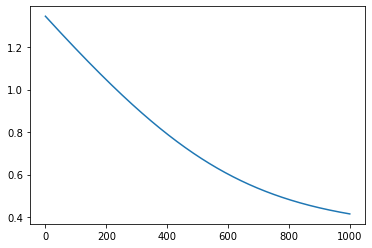

In [25]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1000),model1.history['loss'])
plt.show()

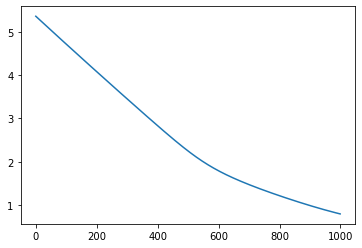

In [26]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1000),model2.history['loss'])
plt.show()

In [35]:
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.optimizers import SGD

In [36]:
model = Sequential()

In [37]:
model.add(Dense(10,activation="relu", input_shape=(4,)))
model.add(Dense(3,activation="softmax"))

In [38]:
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, y_train, X_test, y_test = train_test_split(X,y)

In [44]:
model.fit(X_train,y_train,
            epochs = 1000,
            validation_data=(X_test,y_test))

ValueError: Data cardinality is ambiguous:
  x sizes: 112
  y sizes: 38
Make sure all arrays contain the same number of samples.